In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **I - Data import**

In [2]:
news = pd.read_csv("data/news.csv")
news.drop(['Unnamed: 0'], axis=1, inplace=True)
news.head()

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

# **II-Data analysis**

### Print the first news to see what it looks like

In [3]:
print(f'\t> News title : {news.iloc[0]["title"]}')
print(f'\n\t> News content : {news.iloc[0]["text"]}')
print(f'\n\t> News label : {news.iloc[0]["label"]}')

	> News title : You Can Smell Hillary’s Fear

	> News content : Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 
But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the

### Data set shape

In [4]:
#data set global shape analysis :
def get_data_set_shape(df) :

    try :

        analysis = {
            "counts" : [df.shape[0], df.shape[1]]
        }

        display(
            pd.DataFrame(data=analysis, index=["Rows", "Columns"])
        )

        print("\nColumns type :")
        for col, count in zip(df.dtypes.value_counts().index, df.dtypes.value_counts()) :
            print(f"\t> {str(col)+' ':-<20}> {count}")
    
    except Exception as e :
        print("\t> Something is wrong !")
        return e

In [5]:
get_data_set_shape(news) 

counts
Rows       6335
Columns       3


Columns type :
	> object -------------> 3


### Any missing value ?

In [6]:
news.isna().sum()

title    0
text     0
label    0
dtype: int64

### Labels count

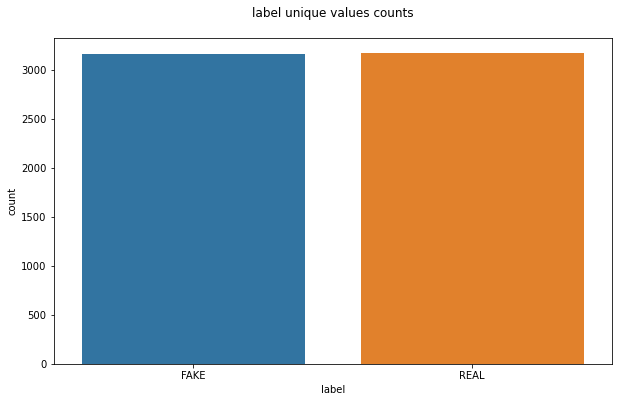

Sample composition :
	> REAL ---------------> 50.06 %
	> FAKE ---------------> 49.94 %


In [7]:
plt.figure(figsize=(10,6))
plt.title(f"label unique values counts\n")
sns.countplot(data = news, x = "label")
plt.show()

value_count = news["label"].value_counts(normalize = True)
print("Sample composition :")
for class_, rate in zip(value_count.index, value_count) :
    print(f"\t> {str(class_)+' ':-<20}> { round((rate*100),2) } %")


# **III-Data preprocessing**

### title column is useless so we will drop it

In [63]:
df = news.copy()
df.drop(["title"], axis=1, inplace=True)
df.head()

text label
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE
2  U.S. Secretary of State John F. Kerry said Mon...  REAL
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE
4  It's primary day in New York and front-runners...  REAL

### Train test split

In [90]:
X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [91]:
print(f"Train sample size : {X_train.shape[0]}")
print(f"Test sample size : {X_test.shape[0]}")

Train sample size : 5068
Test sample size : 1267


### Vectorizer Initialisation

tfidf vectorizer will generate the matrix wich contain the importance of each word into each news
    
> The matrixs shape is equal to (nb_news, nb_words)


In [119]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

vectorized_train = tfidf_vectorizer.fit_transform(X_train) 
vectorized_test = tfidf_vectorizer.transform(X_test)

print(f"* Words count : {len(tfidf_vectorizer.vocabulary_)}\n")
print(f"* Train matrix shape {vectorized_train.shape} : \n\t> News count = {vectorized_train.shape[0]}\n\t> Words count = {vectorized_train.shape[1]}\n")
print(f"* Test matrix shape {vectorized_test.shape} : \n\t> News count = {vectorized_test.shape[0]}\n\t> Words count = {vectorized_test.shape[1]}")


* Words count : 61713

* Train matrix shape (5068, 61713) : 
	> News count = 5068
	> Words count = 61713

* Test matrix shape (1267, 61713) : 
	> News count = 1267
	> Words count = 61713


# **IV-Model**

###  Model initialisation and fit

In [143]:
model = PassiveAggressiveClassifier(max_iter=100)
model.fit(vectorized_train,y_train)

PassiveAggressiveClassifier(max_iter=100)

###  Model test

In [141]:
y_pred = model.predict(vectorized_test)

###  Model evaluation

In [146]:
print(f"Model accuracy on train data : {model.score(vectorized_train,y_train)}")
print(f"Model accuracy on test data : {round(accuracy_score(y_test,y_pred),2)}")

Model accuracy on train data : 1.0
Model accuracy on test data : 0.94


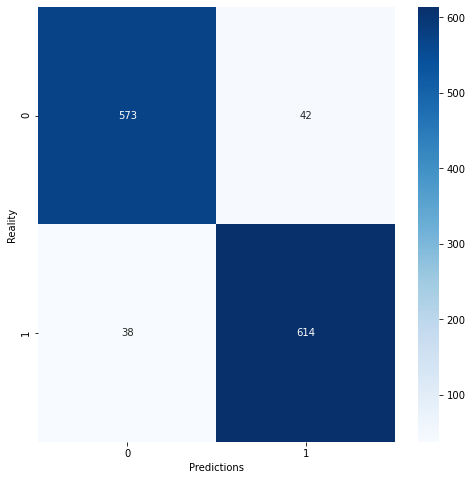

In [147]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=['FAKE','REAL']), annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predictions')
plt.ylabel('Reality')
plt.show()